In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
gender = pd.read_csv('/content/gender_submission.csv')

In [ ]:
women = train.loc[train.Sex == 'female']["Survived"]
suv_women = sum(women)/len(women)
print(" 여성이 살아남은 %:", suv_women)

 여성이 살아남은 %: 0.7420382165605095


In [ ]:
men = train.loc[train.Sex == 'male']['Survived']
suv_men = sum(men)/len(men)
print("남성이 살아남은 %:", suv_men)

남성이 살아남은 %: 0.18890814558058924


In [ ]:
print(train.shape)
train.head(100)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [ ]:
train.info()

In [ ]:
print(test.shape)
test.head()

In [ ]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


* PassengerId : 각 승객의 고유 번호
* Survived : 생존 여부(종속 변수)
0 = 사망
1 = 생존
* Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

1st = Upper
2nd = Middle
3rd = Lower
* Name : 이름
* Sex : 성별
* Age : 나이

* SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
* Parch : 동반한 Parent(부모) Child(자식)의 수

* Ticket : 티켓의 고유넘버

* Fare : 티켓의 요금

* Cabin : 객실 번호

* Embarked : 승선한 항

C = Cherbourg
Q = Queenstown
S = Southampton

In [ ]:
# train data의 object 변수 통계치
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### train data 에서 Pclass 별로 생존율 조사

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### train data 에서 성별(Sex) 에 따른 생존율을 비율

In [ ]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index = True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


### train data 에서 형제자매 배우자 수 의 따른 (SibSp) 생존율

In [ ]:
train[["SibSp", "Survived"]].groupby(["SibSp"], as_index = True).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### 동반한 Parent(부모) Child(자식)의 수  에 따른 생존율

In [ ]:
train[["Parch", "Survived"]].groupby(["Parch"], as_index = True).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


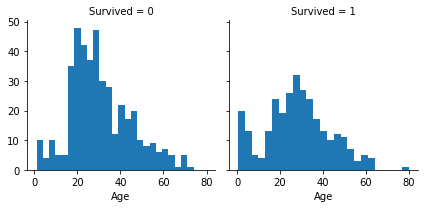

In [ ]:
gr1 = sns.FacetGrid(train, col='Survived')
gr1.map(plt.hist,'Age', bins=25)

* 5세 이하 생존율이 높음

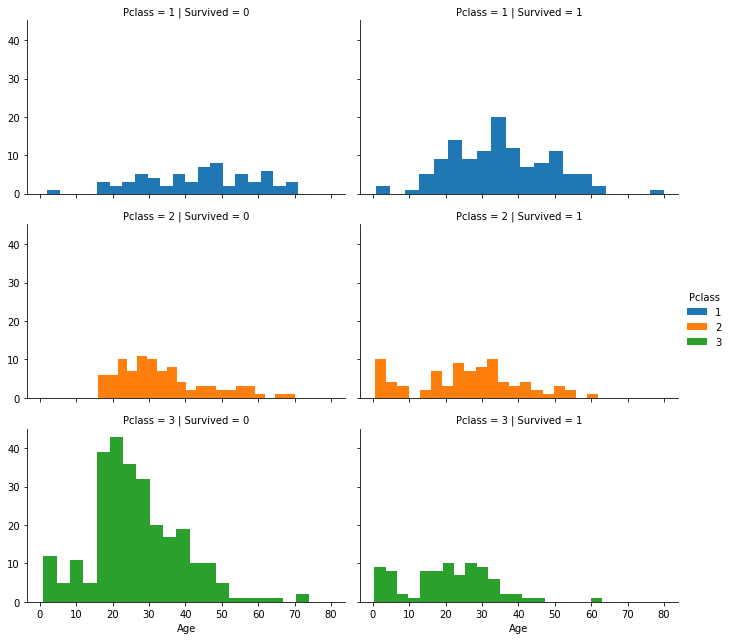

In [ ]:
# 열을 생존 여부, 행(row)과 색깔(hue)을 객실 등급으로 나눔, width = height * aspect
gr2 = sns.FacetGrid(train, col='Survived', row='Pclass', hue="Pclass",  aspect=1.6)
gr2.map(plt.hist, 'Age',  bins=20) 
gr2.add_legend()

* 객실 등급에 따라 생존율이 다름
* 3등급 같은 겨우 인원 가장 많고 생존율 낮음
* 2등급의 어린 유아는 대부분 생존
* 1등급이 다른 객실보다 생존율 높음

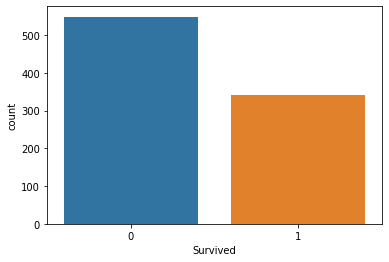

In [ ]:
sns.countplot(x='Survived', data = train)

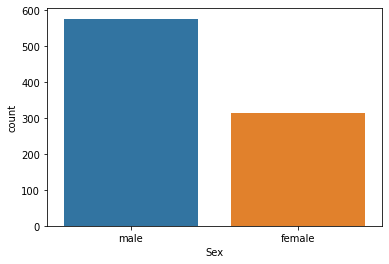

In [ ]:
sns.countplot(x = 'Sex', data = train)

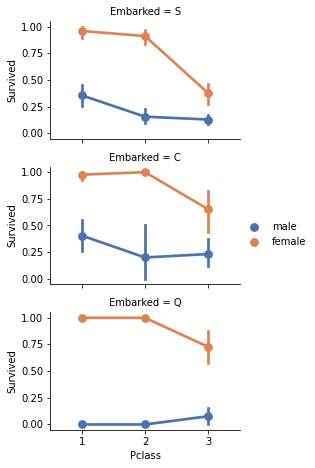

In [ ]:
gr_E = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)

# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
gr_E.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

gr_E.add_legend()

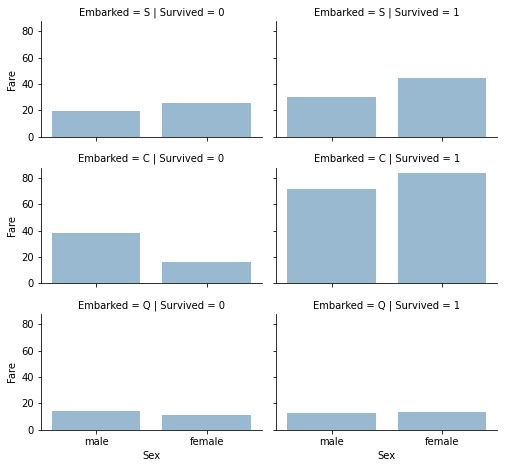

In [ ]:
gr_ES = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
gr_ES.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

gr_ES.add_legend()

### 데이터 전처리 


1. 쓰지 않을 데이터 변수 제거

In [ ]:
train.head()

In [ ]:
print('Before data', train.shape, test.shape)

Before data (891, 12) (418, 11)


In [ ]:
train_df = train.drop(['Ticket', 'Cabin'], axis=1).copy()
test_df = test.drop(['Ticket', 'Cabin'], axis=1).copy()

In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [ ]:
combine_list = [train_df, test_df]
print("After data", train_df.shape, test_df.shape)

After data (891, 10) (418, 9)


In [ ]:
train_df["Name"].unique()

In [ ]:
# train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# pd.crosstab(train_df['Title'], train_df['Sex'])

In [ ]:
for ds in combine_list:
  ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
    # 모든 문자열 A~Za~Zz까지 중에서 뒤에 \n 또는 . 이 오는거 제외하고 추출
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for ds in combine_list:
  ds["Title"]=ds["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

  ds['Title'] = ds['Title'].replace('Mlle','Miss')
  ds['Title'] = ds['Title'].replace('Ms','Miss')
  ds['Title'] = ds['Title'].replace('Mme','Miss')

train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [ ]:
train_df

In [ ]:
title_m = {"Master":1,"Mr":2,"Miss":3,"Mrs":4,'Rare':5}
for ds in combine_list:
  ds['Title'] = ds['Title'].map(title_m)
  ds['Title'] = ds['Title'].fillna(0)

In [ ]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,4
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,2
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,3
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,4
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,2


In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,4
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,4


In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine_list = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [ ]:
for ds in combine_list:
  ds['Sex'] = ds['Sex'].map({'female':1,'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,2
1,1,1,1,38.0,1,0,71.2833,C,4
2,1,3,1,26.0,0,0,7.9250,S,3
3,1,1,1,35.0,1,0,53.1000,S,4
4,0,3,0,35.0,0,0,8.0500,S,2


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,2
1,893,3,1,47.0,1,0,7.0000,S,4
2,894,2,0,62.0,0,0,9.6875,Q,2
3,895,3,0,27.0,0,0,8.6625,S,2
4,896,3,1,22.0,1,1,12.2875,S,4


In [ ]:
# train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
# test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [ ]:
for ds in combine_list:                        # SibSip , Parch로 가족과 함께 탑승하였는지, 가족 동반시에 생존율 확인
  ds['FamilySize']=ds['SibSp'] + ds['Parch'] + 1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    int64  
 9   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 32.8+ KB


* Familt Size = 1이면 혼자서 탑승 

In [ ]:
guess_ages = np.zeros((2,3)) # numpy.zeros() 0으로 채웢니 array 생성하게됨.
for ds in combine_list:
  for i in range(0, 2):
    for j in range(0, 3):
      guess_df = ds[(ds['Sex'] == i) & \
                                  (ds['Pclass'] == j+1)]['Age'].dropna()
            # 위에서 guess_ages사이즈를 [2,3]으로 잡아뒀으므로 j의 범위도 이를 따름
            
      age_guess = guess_df.median()  # 중앙값 구하기.

            # age의 random값의 소수점을 .5에 가깝도록 변형
      guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
  for i in range(0, 2):
    for j in range(0, 3):
      ds.loc[ (ds.Age.isnull()) & (ds.Sex == i) & (ds.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

  ds['Age'] = ds['Age'].astype(int)


In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [ ]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
FamilySize    0
dtype: int64

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,S,2,2
1,2,1,1,1,38.0,1,0,71.2833,C,4,2
2,3,1,3,1,26.0,0,0,7.9250,S,3,1
3,4,1,1,1,35.0,1,0,53.1000,S,4,2
4,5,0,3,0,35.0,0,0,8.0500,S,2,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,0,34,0,0,7.8292,Q,2.0,1
1,893,3,1,47,1,0,7.0000,S,4.0,2
2,894,2,0,62,0,0,9.6875,Q,2.0,1
3,895,3,0,27,0,0,8.6625,S,2.0,1
4,896,3,1,22,1,1,12.2875,S,4.0,3


연령 Age 변수를 범주형 data로 변경해줌

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5) #임의로 5개의 그룹으로 세팅
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


AgeBand 기준으로 Age를 범주형으로 변경하고 다시 AgeBand 삭제

In [ ]:
for ds in combine_list:    
  ds.loc[ ds['Age'] <= 16, 'Age'] = 0
  ds.loc[(ds['Age'] > 16) & (ds['Age'] <= 32), 'Age'] = 1
  ds.loc[(ds['Age'] > 32) & (ds['Age'] <= 48), 'Age'] = 2
  ds.loc[(ds['Age'] > 48) & (ds['Age'] <= 64), 'Age'] = 3
  ds.loc[ ds['Age'] > 64, 'Age']
train_df = train_df.drop(['AgeBand'], axis=1)
combine_list = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,2,2
1,1,1,1,2,1,0,71.2833,C,4,2
2,1,3,1,1,0,0,7.9250,S,3,1
3,1,1,1,2,1,0,53.1000,S,4,2
4,0,3,0,2,0,0,8.0500,S,2,1


In [ ]:
for ds in combine_list:
    ds['IsAlone'] = 0
    ds.loc[ds['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine_list = [train_df, test_df]


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,2,0
1,1,1,1,2,71.2833,C,4,0
2,1,3,1,1,7.9250,S,3,1
3,1,1,1,2,53.1000,S,4,0
4,0,3,0,2,8.0500,S,2,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,2,1
1,893,3,1,2,7.0000,S,4,0
2,894,2,0,3,9.6875,Q,2,1
3,895,3,0,1,8.6625,S,2,1
4,896,3,1,1,12.2875,S,4,0


In [ ]:
embak = train_df.Embarked.dropna().mode()[0]  #최대 빈도수의 값을 찾아줌.
embak
# test_df.head()

'S'

In [ ]:
for ds in combine_list:
    ds['Embarked'] = ds['Embarked'].fillna(embak)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for ds in combine_list:
  ds['Embarked'] = ds['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,2,0
1,1,1,1,2,71.2833,1,4,0
2,1,3,1,1,7.9250,0,3,1
3,1,1,1,2,53.1000,0,4,0
4,0,3,0,2,8.0500,0,2,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,2,1
1,893,3,1,2,7.0000,0,4,0
2,894,2,0,3,9.6875,2,2,1
3,895,3,0,1,8.6625,0,2,1
4,896,3,1,1,12.2875,0,4,0


In [ ]:
train_df.head(100)


In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,2,1
1,893,3,1,2,7.0000,0,4,0
2,894,2,0,3,9.6875,2,2,1
3,895,3,0,1,8.6625,0,2,1
4,896,3,1,1,12.2875,0,4,0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   IsAlone      418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4) # qcut 동일 개수로 4등분 나눠주는 작업을 하고
# 4등분 나눈 fare 랑 생존이랑 groupby FareBand 로 해서 상관관계확인
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
for ds in combine_list:
  ds.loc[ ds['Fare'] <= 7.91, 'Fare'] = 0
  ds.loc[(ds['Fare'] > 7.91) & (ds['Fare'] <= 14.454), 'Fare'] = 1
  ds.loc[(ds['Fare'] > 14.454) & (ds['Fare'] <= 31), 'Fare']   = 2
  ds.loc[ ds['Fare'] > 31, 'Fare'] = 3
  ds['Fare'] = ds['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine_list = [train_df, test_df]
    

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,2,0
1,1,1,1,2,3,1,4,0
2,1,3,1,1,1,0,3,1
3,1,1,1,2,3,0,4,0
4,0,3,0,2,1,0,2,1


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,2,1
1,893,3,1,2,0,0,4,0
2,894,2,0,3,1,2,2,1
3,895,3,0,1,1,0,2,1
4,896,3,1,1,1,0,4,0


In [ ]:
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
x_test = test_df.drop("PassengerId", axis=1).copy()

In [ ]:
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel='linear'))])]

In [ ]:
classifier_names = ['D_tree', 'RF', 'GNB', 'KNN', 'Ada', 'Qda', 'SVM_l', 'Votng']

In [ ]:
modelaccuracies = []
modelmeans = []
modelnames = []

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10, shuffle=True)
  accuracies = cross_val_score(classifier, X=x_train, y=y_train, cv=skf)
  print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))

  modelaccuracies.append(accuracies)
  modelnames.append(classifier_name)
  modelmeans.append(accuracies.mean()*100)

Mean accuracy of D_tree : 81.26 %
Mean accuracy of RF : 81.15 %
Mean accuracy of GNB : 75.31 %
Mean accuracy of KNN : 79.79 %
Mean accuracy of Ada : 78.68 %
Mean accuracy of Qda : 80.92 %
Mean accuracy of SVM_l : 75.98 %
Mean accuracy of Votng : 81.38 %


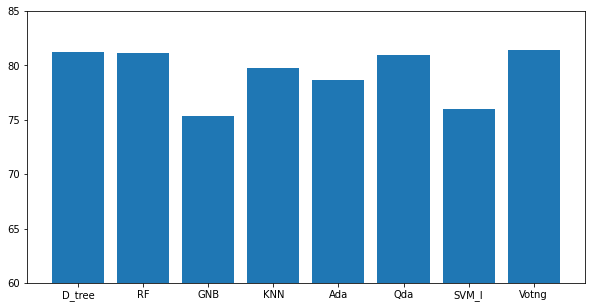

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim([60, 85])
plt.bar(modelnames, modelmeans);

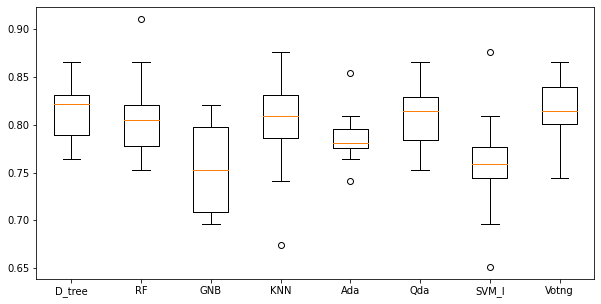

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

In [ ]:
V = VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel='linear'))])

V.fit(x_train, y_train)
V.score(x_train, y_train)


0.8305274971941639

In [ ]:
result = V.predict(x_test)


In [ ]:
a = pd.DataFrame(result,'Survived'})
a.to_csv('Submission.csv')

In [ ]:
a = pd.read_csv('/content/gender_submission.csv')
a

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
